## Modelo de predición de cancer de mama (Wisconsin uci)

In [24]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from random import random 

In [2]:
# Importamos los datos desde el repositorio oficial
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
header=None)

In [3]:
# Vemos la estructura del dataframe
# Columna 0 --> ID
# Columna 1 --> Clase
# Columnas 2.. -> Datos
df[:2]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
# Separamos el dataset en (Conjunto de datos, Etiquetas)
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [5]:
# Separamos el conjunto total en dos subconjuntos (Train 80% / Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
weak_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)

In [7]:
# Creamos un flujo de trabajo (pipeline):
# Paso 1 -> Escalar los datos
# Paso 2 -> Analisis de componentes principales (Reduce la dimensionalidad)
# Paso 3 -> Construimos un modelo utilizando Regresión Logística


pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', XGBClassifier())])

# Ajustamos el modelo a los datos de entrenamiento
pipe_lr.fit(X_train, y_train)

#Calculamos la precisión del modelo utilizando los datos de test
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.982


/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [8]:
# Como cambia el accuracy al aumentar el ruido:

In [9]:
def accuracy_noise_level(N, X_train, y_train, X_test, y_test):
    
    change = lambda x: 'M' if x == 'B' else 'B'
    def change_rand(N):
        return lambda x: change(x) if random() < N/100 else x
    
    y_train = list(map(change_rand(N), y_train))

    pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', XGBClassifier())])

    # Ajustamos el modelo a los datos de entrenamiento
    pipe_lr.fit(X_train, y_train)

    #Calculamos la precisión del modelo utilizando los datos de test
    return pipe_lr.score(X_test, y_test)

In [10]:
accuracy_noise_level(0, X_train, y_train, X_test, y_test)

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9824561403508771

In [11]:
accuracies = [accuracy_noise_level(N, X_train, y_train, X_test, y_test) for N in range(40)]

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

In [12]:
accuracies

[0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9385964912280702,
 0.9912280701754386,
 0.9649122807017544,
 0.9473684210526315,
 0.9473684210526315,
 0.9649122807017544,
 0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.956140350877193,
 0.9210526315789473,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.9210526315789473,
 0.9298245614035088,
 0.8947368421052632,
 0.9122807017543859,
 0.9385964912280702,
 0.9210526315789473,
 0.9122807017543859,
 0.8596491228070176,
 0.8245614035087719,
 0.8070175438596491,
 0.8333333333333334,
 0.8421052631578947,
 0.7631578947368421,
 0.7543859649122807,
 0.7894736842105263,
 0.7982456140350878,
 0.8245614035087719,
 0.7368421052631579,
 0.8157894736842105,
 0.7807017543859649,
 0.7456140350877193,
 0.6929824561403509]

In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

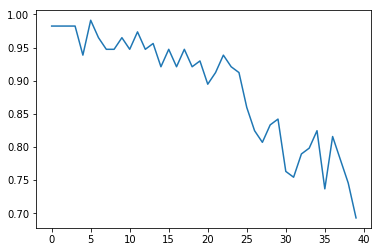

In [15]:
fig = plt.figure()
ax = plt.axes()

ax.plot(range(40), accuracies);

In [36]:
def accuracy_noise_level_robust(N, X_train, y_train, X_test, y_test):
    
    change = lambda x: 'M' if x == 'B' else 'B'
    def change_rand(N):
        return lambda x: change(x) if random() < N/100 else x
    
    y_train = list(map(change_rand(N), y_train))

    pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', XGBClassifier(gamma=5))])

    # Ajustamos el modelo a los datos de entrenamiento
    pipe_lr.fit(X_train, y_train)

    #Calculamos la precisión del modelo utilizando los datos de test
    return pipe_lr.score(X_test, y_test)

In [37]:
accuracies_robust = [accuracy_noise_level_robust(N, X_train, y_train, X_test, y_test) for N in range(40)]

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

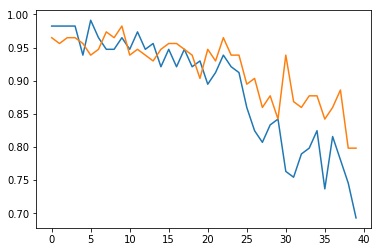

In [18]:
fig = plt.figure()
ax = plt.axes()

ax.plot(range(40), accuracies);
ax.plot(range(40), accuracies_robust);

In [49]:
def custom_loss(y_true, y_pred):
    grad = (y_true - y_pred)/((y_true - y_pred)**4 + 1)
    hess = (1 - 3*(y_true - y_pred)**4)/((y_true - y_pred)**4 + 1)**2
    return grad, hess
    
    
def custom_loss(y_true, y_pred):
    grad = 2*(y_true - y_pred)
    hess = y_true * 0 + 2
    return grad, hess
    

In [56]:
def accuracy_noise_level_custom_robust(N, X_train, y_train, X_test, y_test):
    
    change = lambda x: 'M' if x == 'B' else 'B'
    def change_rand(N):
        return lambda x: change(x) if random() < N/100 else x
    
    y_train = list(map(change_rand(N), y_train))

    pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', XGBClassifier(objective='multi:softmax'))])

    # Ajustamos el modelo a los datos de entrenamiento
    pipe_lr.fit(X_train, y_train)

    #Calculamos la precisión del modelo utilizando los datos de test
    return pipe_lr.score(X_test, y_test)

In [57]:
accuracies_custom_robust = [accuracy_noise_level_custom_robust(N, X_train, y_train, X_test, y_test) for N in range(40)]

XGBoostError: b'value 0 for Parameter num_class should be greater equal to 1'

In [52]:
custom_loss(np.array([0,1,1,2]), np.array([0,2,2,2]))

(array([ 0, -2, -2,  0]), array([2, 2, 2, 2]))

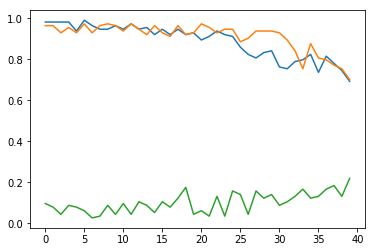

In [53]:
fig = plt.figure()
ax = plt.axes()

ax.plot(range(40), accuracies);
ax.plot(range(40), accuracies_robust)
ax.plot(range(40), accuracies_custom_robust);